In [23]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_72088/732388558.py:16: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  [print(k) for k in cdat.iterkeys()]
/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_72088/732388558.py:16: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  [print(k) for k in cdat.iterkeys()]
/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_72088/732388558.py:16: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  [print(k) for k in cdat.iterkeys()]


m
lim
params
cp /Users/dcmoore/grace/impulse/steriles/limits/h_3_limit_2.0e-01_10_365.0_25.0_1.0e+03.npz /Users/dcmoore/grace/impulse/steriles/limits/h_3_limit_2.0e-01_10_365.0_25.0_1.0e+03_old.npz
m
lim
params
cp /Users/dcmoore/grace/impulse/steriles/limits/h_3_limit_2.0e-01_1000_365.0_25.0_1.0e+03.npz /Users/dcmoore/grace/impulse/steriles/limits/h_3_limit_2.0e-01_1000_365.0_25.0_1.0e+03_old.npz
m
lim
params
cp /Users/dcmoore/grace/impulse/steriles/limits/p_32_limit_1.0e-02_1000_365.0_100.0_1.0e+05.npz /Users/dcmoore/grace/impulse/steriles/limits/p_32_limit_1.0e-02_1000_365.0_100.0_1.0e+05_old.npz


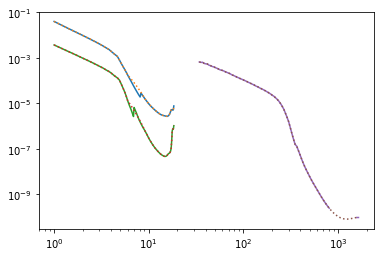

In [38]:
iso_dict = {"h_3": [[0.2, 10, 365, 25, 1e3],[0.2, 1000, 365, 25, 1e3],],
            "p_32": [[1e-2, 1000, 365, 100, 1e5],]
        }


iso_list = iso_dict.keys()

plt.figure()
for iso in iso_list:
    for params_to_use in iso_dict[iso]:
        f = glob.glob("/Users/dcmoore/grace/impulse/steriles/limits/%s*%.1e_%d_%.1f_%.1f_%.1e.npz"%(iso,*params_to_use))

        cdat = np.load(f[0])
        x = cdat['m']
        lim_vals = cdat['lim'] 

        plt.loglog(x, lim_vals)  

        if(iso == 'h_3'):
            gpts = (x < 6.2) | (x > 9)
            lim_vals[~gpts] = np.exp(np.interp(x[~gpts], x[gpts], np.log(lim_vals[gpts])))
        elif(iso == 'p_32'):
            gpts = ~np.isnan(lim_vals)
            ff = interp1d(x[gpts], np.log(lim_vals[gpts]), kind='cubic')
            ipts = ~gpts & (x < 1700)
            lim_vals[ipts] = np.exp(ff(x[ipts]))

        plt.loglog(x, lim_vals, ":")  

        cfile = f[0]
        cfile_old = cfile.replace(".npz", "_old.npz")
        com = "cp %s %s"%(cfile, cfile_old)
        print(com)
        
        #os.system(com)
        #np.savez(cfile, m=x, lim=lim_vals, params=cdat['params'])